# Exploratory Data Analysis and Feature Engineering Task in FSDS 2022 at iNeuron
## In this Task:
## **Exploratory Data Analysis before Pre-Processing**
  - **1. Profile of Data**
         1.1 Number of Rows and Columns in Dataset
         1.2 Types of Features in Dataset
         1.3 Level of Measurements in Dataset
         1.4 Missing Values in Dataset
         1.5 Memory
         1.6 Duplicate and Unique Values in Features
  - **2. Statistical Analysis**
         2.1 Univariate
            2.1.1 Numerical Features
            2.1.2 Categorical Features
         2.2 Bivariate
            2.2.1 Continous Features
            2.2.2 Continuous vs Categorical Features
   - **3. Graph Bases Analysis**
         3.1 Univariate
             3.1.1 Univariate Analysis of Numerical Features
             3.1.2 Univariate Analysis of Categorical Variables
             3.1.3 Analysis of Outliers: BoxPlot
         3.2 Bivariate
             3.2.1 Bivariate Analysis of Numerical Features: Scatter Plot
             3.2.2 Bivariate Analysis of Categorical Variables vs Categorical Variables: Count Plot side by side bar chart
         3.3 Multivariate: Pair plot
 ####        
- LinkedIn: https://www.linkedin.com/in/km-jyoti-pandey/
- GitHub: https://github.com/JyotiPandey111

In [4]:
# Importing Libraries
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Reading Dataset "Travel"

In [137]:
data = pd.read_csv("Travel.csv")
# top five rows of dataset
data.head() 
# observation: Top 5 rows in dataset "Travel"

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


####
### **1. Profile of Data**
         1.1 Number of Rows and Columns in Dataset
         1.2 Types of Features in Dataset
         1.3 Level of Measurements in Dataset
              - Qualitative Level
                   - Nominal
                   - Ordinal
              - Quantitative Level
                   - Interval
                   - Ratio
         1.4 Missing Values in Dataset
         1.5 Memory    
         1.6 Duplicate and Unique Values in Features
-- I have prepared a dataframe regarding above mentioned points for **Profile of Data**.

In [462]:
print("\n                                       \033[1mPROFILE OF DATASET 'TRAVEL' BEFORE PRE-PROCESSING  \033[0m                                  \n")
# Finding the shape of dataset
print(f"\033[1m1.1\033[0m There are {data.shape[0]} rows and {data.shape[1]} columns in the dataset 'Travel'\n")
# Seperating Numerical and Categorical Features from dataset
num_colum = [fea for fea in data.columns if data[fea].dtype != 'O']
cat_colum = [fea for fea in data.columns if data[fea].dtype == 'O']
num_cat_info= ['ProdTaken','CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting']
num_info = ['Age', 'DurationOfPitch','NumberOfTrips', 'MonthlyIncome' ]
print(f"\033[1m1.2\033[0m There are {len(num_colum)} Numerical Features and {len(cat_colum)} Categorical Features in the dataset 'Travel '")
print(f"Numerical Features are: {num_colum}\n")
print(f"Categorical Features are: {cat_colum}\n")
print(f"Features with numerical values having categorical information: {num_cat_info}\n")
print(f"Features with numerical values with continuous information: {num_info} \n")
# Finding the duplicate values in Datset
print(f"\nThere are {data.duplicated().sum()} duplicate values in Dataset 'Travel'")
# Finding the number of unique values in each feature of dataset
unique = pd.DataFrame(data.nunique(), columns=['Unique'])
# creating a dictionary with help of information we get from info() regarding the data type of the features
types = {'DataTypes': ['Numeric', 'Numeric', 'Numeric', 'Categorical', 'Numeric', 'Numeric', 'Categorical', 'Categorical', 'Numeric', 'Numeric', 'Categorical', 'Numeric', 'Categorical', 'Numeric', 'Numeric', 'Numeric', 'Numeric', 'Numeric', 'Categorical', 'Numeric' ]}
# creating a dictionary with help of understanding of measurement of level: Nominal, Ordinal, Interval, Ratio
level = {'Level': ['Nominal','Nominal', 'Ordinal', 'Nominal', 'Ordinal', 'Ratio', 'Nominal', 'Nominal', 'Ratio', 'Ratio', 'Ordinal', 'Ordinal', 'Nominal', 'Ratio', 'Nominal', 'Ordinal', 'Nominal', 'Ratio', 'Ordinal', 'Ratio']}
# creating a dictionary consisting of unique values in dataset feature (only those features which are having category nature of the data)
unique_values= {'Unique_Values':['-', '[1, 0]', '-', "['Self Enquiry', 'Company Invited', nan]", "[3, 1, 2]", "-", "['Salaried', 'Free Lancer', 'Small Business', 'Large Business']", "['Female', 'Male', 'Fe Male']", "[3, 2, 1, 4, 5]", "[3.0, 4.0, 2.0, 5.0, nan, 1.0, 6.0]", "['Deluxe', 'Basic', 'Standard', 'Super Deluxe', 'King']", "[3.0, 4.0, 5.0, nan]", "['Single', 'Divorced', 'Married', 'Unmarried']", "-", "[1, 0]", "[2, 3, 5, 4, 1]", "[1, 0]", "[0.0, 2.0, 1.0, nan, 3.0]", "['Manager', 'Executive', 'Senior Manager', 'AVP', 'VP']", "-"] }
# creating a dataframe of missing values in dataset 'Travel'
null_values = pd.DataFrame(data.isnull().sum(),columns=['Missing Values'])
# creating an dataframe of memory occupied by the features.
memory = pd.DataFrame(data.memory_usage(), columns=['Memory'])
# creating an dataframe classifies the types the features in dataset 'Travel'.
types = pd.DataFrame(types,index=data.columns)
# craeting an dataframe classifies the level of measurement of features of dataset 'Travel'.
level = pd.DataFrame(level,index=data.columns)
# creating a datset classifing the value swhich are unique in feature shaving a categorical nature. 
#NOTE: categorical features have numeric values as class
unique_values = pd.DataFrame(unique_values,index=data.columns)
pd.concat([types, level,null_values, unique,unique_values,memory], axis=1)
# CustomerID is an Unique Feature, we can say it is Nominal despite of being a quantitative level because it is purily Numeric id in this use case.
# Age is considered a ratio variable because it has a “true zero” value. It's possible for an individual to be zero years old (a newborn).
# Generally speaking, age is an ordinal variable since the number assigned to a person's age is meaningful and not simple an arbitrarily chosen number/marker.


                                       PROFILE OF DATASET 'TRAVEL' BEFORE PRE-PROCESSING                                    

1.1 There are 4888 rows and 20 columns in the dataset 'Travel'

1.2 There are 14 Numerical Features and 6 Categorical Features in the dataset 'Travel '
Numerical Features are: ['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome']

Categorical Features are: ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']

Features with numerical values having categorical information: ['ProdTaken', 'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting']

Features with numerical values with continuous information: ['Age', 'DurationOfPitch', 'Num

,DataTypes,Level,Missing Values,Unique,Unique_Values,Memory
CustomerID,Numeric,Nominal,0.0,4888.0,-,39104
ProdTaken,Numeric,Nominal,0.0,2.0,"[1, 0]",39104
Age,Numeric,Ordinal,226.0,44.0,-,39104
TypeofContact,Categorical,Nominal,25.0,2.0,"['Self Enquiry', 'Company Invited', nan]",39104
CityTier,Numeric,Ordinal,0.0,3.0,"[3, 1, 2]",39104
DurationOfPitch,Numeric,Ratio,251.0,34.0,-,39104
Occupation,Categorical,Nominal,0.0,4.0,"['Salaried', 'Free Lancer', 'Small Business', ...",39104
Gender,Categorical,Nominal,0.0,3.0,"['Female', 'Male', 'Fe Male']",39104
NumberOfPersonVisiting,Numeric,Ratio,0.0,5.0,"[3, 2, 1, 4, 5]",39104
NumberOfFollowups,Numeric,Ratio,45.0,6.0,"[3.0, 4.0, 2.0, 5.0, nan, 1.0, 6.0]",39104


####
### **2. Statistical Analysis**
         2.1 Univariate
            2.1.1 Numerical Features
            2.1.2 Categorical Features
         2.2 Bivariate
            2.2.1 Continous Features
            2.2.2 Continuous vs Categorical Features


### 2.1 Univariate
#### 2.1.1 Univariate Analysis of Numerical Features

In [378]:
# Removing the unique feature 'CustomerID' for statistical analysis
num_colum.remove('CustomerID')
data[num_colum].describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0


**Observations of Univariate Analysis of Numerical Features**
   1. **Age**: 
      - Average age is approx. 38 years with standard devaition of 9.31.
      - In the dataset 'Travel', the youngest person entry is 18 years old and the oldest is 61 years old.
      - 25 percentage of entries holds people below 31 years old.
      - 50 percentage of entries holds people below 36 years old.
      - 75 percentage of entries holds people below 44 years old.
   2. **DurationOfPitch**
      - Average duration of pitch is approx. 15.49 with standard devaition of 8.52.
      - In the dataset 'Travel', the minimum duration of pitch is 5 and maximum is 127.
   3. **NumberOfPersonVisiting**
      - The average number of person visiting is 2.90 with standard deviation of 1.00.
      - Minimum number of person visiting is 1 and maximum is 5.
   4. **NumberOfFollowups**
      - The average number of followups is 3.70 with standard deviation of 0.72.
      - Minimum number of followups is 1 and maximum is 6. 
   5. **NumberOfTrips**
      - The average number of trips is 3.23 with standard deviation of 1.84.
      - Minimum number of trips is 1 and maximum is 22.
      - 25 percentage of entries holds people who has trips below 2.
      - 50 percentage of entries holds people who has trips below 3.
      - 75 percentage of entries holds people who has trips below 4.
      - NumberOfTrips follows RIGHT SKEWED DISTRIBUTION.
   6. **MonthlyIncome**
      - Average monthly income is approx. 23619.85 with standard devaition of 5380.69.
      - In the dataset 'Travel', the lowest salary a person get is 1000.0 and the highest is 98678.0.
      - 25 percentage of entries holds people who has salary below 20346.
      - 50 percentage of entries holds people who has salary below 22347.
      - 75 percentage of entries holds people who has salary below 25571.
      - MonthlyIncome follows RIGHT SKEWED DISTRIBUTION.

#### 2.1.2 Univariate Analysis of Categorical Features

In [379]:
data[cat_colum].describe().T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


#### **Skewness**
- The three types of skewness are:
  - Right skew (also called positive skew). A right-skewed distribution is longer on the right side of its peak than on its left.
  - Left skew (also called negative skew). A left-skewed distribution is longer on the left side of its peak than on its right.
  - Zero skew.

In [380]:
data.skew()
# NumberOfFollowups, PitchSatisfactionScore, OwnCar are negatively skewed means left skewed. 
# rest are positively skwed except CustomerID(unique feature.)

CustomerID                  0.000000
ProdTaken                   1.595763
Age                         0.382989
CityTier                    0.736531
DurationOfPitch             1.752037
NumberOfPersonVisiting      0.029817
NumberOfFollowups          -0.372719
PreferredPropertyStar       0.895545
NumberOfTrips               1.453884
Passport                    0.920980
PitchSatisfactionScore     -0.127726
OwnCar                     -0.495892
NumberOfChildrenVisiting    0.272199
MonthlyIncome               1.949160
dtype: float64

### 2.2 Bivariate
#### 2.2.1 Bivariate Analysis of Numerical Features
#### **Covariance:**
        - If covariance gets found as positive. It means variable X and variable Y variate in the same direction. In other words, if a value in variable X is higher, it is expected to be high in the corresponding value in variable Y too. In short, there is a positive relationship between them. 
        - If there is a negative covariance, this is interpreted right as the opposite. That is, there is a negative relationship between the two variables.

In [381]:
data[num_colum].cov()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
ProdTaken,0.152822,-0.535959,0.031120,0.260897,0.002728,0.043969,0.031050,0.013743,0.046318,0.027440,-0.002184,0.002494,-2.760977e+02
Age,-0.535959,86.795067,-0.134168,-0.944440,0.078126,-0.024058,-0.077447,3.158372,0.141269,0.235235,0.220050,0.058470,2.336518e+04
CityTier,0.031120,-0.134168,0.840125,0.176544,-0.001110,0.021716,-0.006707,-0.050474,0.000747,-0.052778,0.001698,0.000529,2.559460e+02
DurationOfPitch,0.260897,-0.944440,0.176544,72.584310,0.401434,0.080699,-0.045149,0.154174,0.128118,-0.033569,-0.006731,0.229346,-2.891828e+02
NumberOfPersonVisiting,0.002728,0.078126,-0.001110,0.401434,0.525466,0.238479,0.019575,0.261809,0.003680,-0.019386,0.003646,0.380176,7.565188e+02
NumberOfFollowups,0.043969,-0.024058,0.021716,0.080699,0.238479,1.005024,-0.019309,0.259783,0.002265,0.005550,0.005894,0.246696,9.580277e+02
PreferredPropertyStar,0.031050,-0.077447,-0.006707,-0.045149,0.019575,-0.019309,0.636818,0.017840,0.000377,-0.024736,0.006102,0.024441,5.884892e+01
NumberOfTrips,0.013743,3.158372,-0.050474,0.154174,0.261809,0.259783,0.017840,3.418872,0.010882,-0.011035,-0.010622,0.267269,1.265226e+03
Passport,0.046318,0.141269,0.000747,0.128118,0.003680,0.002265,0.000377,0.010882,0.206326,0.001815,-0.004923,0.007898,6.230027e+00
PitchSatisfactionScore,0.027440,0.235235,-0.052778,-0.033569,-0.019386,0.005550,-0.024736,-0.011035,0.001815,1.865387,0.045641,0.001029,2.236679e+02


- Older people are more probable to have higher number of trips as 'Age' has covariance with 'NumberOfTrips' = 3.158372.
- Older people has high monthly income as 'MonthlyIncome' has covariance of 23365.183349 with Age.
- People with high monthlt income are more probable to travel in higher city tier with covariance of 255.945958.
- As the city tier increases number of person visiting redices. people are less probable to travel in higher city tier.
- People who owns car are less probab;e to have a passport.

#### **Correlation:**
  - Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.
  - more the vlaue towards +1, more positively correlated it is. more the value towards -1 more the negatively correlated it is.

In [459]:
data[num_colum].corr(method = 'pearson') # linear data
#data[num_colum].corr(method = 'spearman') non-linear data

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
ProdTaken,1.000000,-0.147254,0.086852,0.078257,0.009627,0.112171,0.099577,0.018898,0.260844,0.051394,-0.011508,0.007421,-0.130585
Age,-0.147254,1.000000,-0.015625,-0.012063,0.011621,-0.002577,-0.010474,0.184905,0.033399,0.018510,0.048654,0.007370,0.464869
CityTier,0.086852,-0.015625,1.000000,0.022703,-0.001671,0.023652,-0.009164,-0.029709,0.001793,-0.042160,0.003817,0.000672,0.051817
DurationOfPitch,0.078257,-0.012063,0.022703,1.000000,0.065141,0.009434,-0.006637,0.009715,0.033034,-0.002880,-0.001626,0.031408,-0.006252
NumberOfPersonVisiting,0.009627,0.011621,-0.001671,0.065141,1.000000,0.328569,0.033867,0.195223,0.011177,-0.019581,0.010362,0.610621,0.195134
NumberOfFollowups,0.112171,-0.002577,0.023652,0.009434,0.328569,1.000000,-0.024176,0.139517,0.004970,0.004054,0.012112,0.286425,0.176503
PreferredPropertyStar,0.099577,-0.010474,-0.009164,-0.006637,0.033867,-0.024176,1.000000,0.012115,0.001040,-0.022701,0.015742,0.035798,0.014289
NumberOfTrips,0.018898,0.184905,-0.029709,0.009715,0.195223,0.139517,0.012115,1.000000,0.012949,-0.004378,-0.011825,0.168795,0.139105
Passport,0.260844,0.033399,0.001793,0.033034,0.011177,0.004970,0.001040,0.012949,1.000000,0.002926,-0.022330,0.020264,0.002545
PitchSatisfactionScore,0.051394,0.018510,-0.042160,-0.002880,-0.019581,0.004054,-0.022701,-0.004378,0.002926,1.000000,0.068850,0.000878,0.030421


- NumberOfChildrenVisiting and NumberOfPersonVisiting are correlated with positive 0.610621. highly coreelated. 

#### 2.2.2 Bivariate Analysis of Continuous vs Categorical Features
- Now we will try to see how values of continuous variables behave for different values of categorical variables.
- We will use the ‘Approved’ column of the data as the categorical variable for our analysis. Comparing the column ‘Approved’ column with other columns can provide us with some useful insights.

In [383]:
print("Features with numerical values having categorical information: ", num_cat_info)
print("Features with numerical values with continuous information: ", num_info)
print("Feature with Numerical values: ", num_colum)
print("Features with Categorical values: ", cat_colum)

Features with numerical values having categorical information:  ['ProdTaken', 'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting']
Features with numerical values with continuous information:  ['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']
Feature with Numerical values:  ['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome']
Features with Categorical values:  ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


In [384]:
# Group DataFrame using a mapper or by a Series of columns.
data.groupby('TypeofContact').mean()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
TypeofContact,,,,,,,,,,,,,,
Company Invited,202464.641297,0.218464,37.286344,1.668076,15.894303,2.909091,3.733618,3.540636,3.204200,0.290345,3.116984,0.618041,1.195745,23390.292068
Self Enquiry,202443.153020,0.176249,37.819542,1.648664,15.327884,2.907666,3.701230,3.598773,3.252244,0.293264,3.064170,0.621661,1.188072,23713.525106


In [310]:
data.groupby('Occupation').mean()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
Occupation,,,,,,,,,,,,,,
Free Lancer,201224.000000,1.000000,37.500000,1.000000,8.500000,3.500000,4.500000,3.000000,7.500000,1.000000,3.000000,0.000000,0.500000,18929.000000
Large Business,202443.207373,0.276498,36.637681,1.589862,14.713592,2.877880,3.756944,3.597222,3.456019,0.285714,3.248848,0.649770,1.191142,22876.969048
Salaried,202448.066723,0.174831,37.649068,1.521115,15.200177,2.910473,3.709966,3.551871,3.221062,0.288851,3.112331,0.634291,1.183849,23649.702607
Small Business,202439.542226,0.184261,37.796687,1.819578,15.996939,2.904031,3.695779,3.611272,3.202877,0.293666,3.003839,0.598848,1.190984,23748.708629


In [313]:
data.groupby('ProductPitched').mean()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
ProductPitched,,,,,,,,,,,,,,
Basic,202467.300760,0.299674,33.054181,1.349620,15.194834,2.929967,3.693822,3.585551,3.096353,0.308360,3.081433,0.588491,1.199348,19939.922507
Deluxe,202428.935335,0.117783,37.382193,1.928406,15.935839,2.891455,3.701765,3.560370,3.282081,0.277136,3.006928,0.610855,1.177354,22643.157629
King,202392.356522,0.086957,48.065217,1.443478,12.100000,2.847826,3.804348,3.478261,3.344595,0.260870,3.226087,0.721739,1.358852,35878.947826
Standard,202430.997305,0.167116,40.581646,1.800539,15.986505,2.920485,3.791105,3.647773,3.317139,0.283019,3.061995,0.652291,1.178138,26637.749326
Super Deluxe,202450.590643,0.058480,48.026316,1.730994,16.230994,2.845029,3.576023,3.578947,3.589041,0.304094,3.356725,0.701754,1.073333,32241.046784


In [312]:
data.groupby('MaritalStatus').mean()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
MaritalStatus,,,,,,,,,,,,,,
Divorced,201766.336842,0.130526,38.556906,1.677895,15.383073,2.931579,3.677249,3.578390,3.234973,0.290526,3.178947,0.652632,1.157556,24184.915743
Married,202714.252137,0.139316,38.264614,1.619658,15.704749,2.930769,3.672124,3.595443,3.310787,0.291453,3.043590,0.615385,1.212462,23858.551167
Single,202019.401747,0.331878,35.767386,1.594978,15.094545,2.671397,3.603352,3.558242,2.950506,0.305677,3.099345,0.596070,0.997768,22234.193357
Unmarried,203027.398827,0.243402,36.539589,1.819648,15.412023,3.093842,4.013196,3.565982,3.365103,0.269795,3.027859,0.624633,1.391496,23805.494135


In [311]:
data.groupby('Designation').mean()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
Designation,,,,,,,,,,,,,,
AVP,202450.590643,0.058480,48.026316,1.730994,16.230994,2.845029,3.576023,3.578947,3.589041,0.304094,3.356725,0.701754,1.073333,32241.046784
Executive,202467.300760,0.299674,33.054181,1.349620,15.194834,2.929967,3.693822,3.585551,3.096353,0.308360,3.081433,0.588491,1.199348,19939.922507
Manager,202428.935335,0.117783,37.382193,1.928406,15.935839,2.891455,3.701765,3.560370,3.282081,0.277136,3.006928,0.610855,1.177354,22643.157629
Senior Manager,202430.997305,0.167116,40.581646,1.800539,15.986505,2.920485,3.791105,3.647773,3.317139,0.283019,3.061995,0.652291,1.178138,26637.749326
VP,202392.356522,0.086957,48.065217,1.443478,12.100000,2.847826,3.804348,3.478261,3.344595,0.260870,3.226087,0.721739,1.358852,35878.947826


In [315]:
print(cat_colum)

['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


In [316]:
data.groupby('TypeofContact').count()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
TypeofContact,,,,,,,,,,,,,,,,,,,
Company Invited,1419,1419,1362,1419,1334,1419,1419,1419,1404,1419,1415,1419,1381,1419,1419,1419,1410,1419,1349
Self Enquiry,3444,3444,3275,3444,3303,3444,3444,3444,3414,3444,3422,3444,3342,3444,3444,3444,3387,3444,3306


In [317]:
data.groupby('Occupation').count()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
Occupation,,,,,,,,,,,,,,,,,,,
Free Lancer,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Large Business,434,434,414,434,434,412,434,434,432,434,432,434,432,434,434,434,429,434,420
Salaried,2368,2368,2254,2363,2368,2263,2368,2368,2348,2368,2352,2368,2298,2368,2368,2368,2328,2368,2263
Small Business,2084,2084,1992,2064,2084,1960,2084,2084,2061,2084,2076,2084,2016,2084,2084,2084,2063,2084,1970


In [318]:
data.groupby('Gender').count()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
Gender,,,,,,,,,,,,,,,,,,,
Fe Male,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155,155
Female,1817,1817,1735,1807,1817,1707,1817,1817,1800,1817,1805,1817,1773,1817,1817,1817,1777,1817,1719
Male,2916,2916,2772,2901,2916,2775,2916,2916,2888,2916,2902,2916,2820,2916,2916,2916,2890,2916,2781


In [319]:
data.groupby('ProductPitched').count()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
ProductPitched,,,,,,,,,,,,,,,,,,,
Basic,1842,1842,1698,1832,1842,1781,1842,1842,1842,1829,1841,1842,1837,1842,1842,1842,1841,1842,1755
Deluxe,1732,1732,1651,1717,1732,1543,1732,1732,1732,1700,1731,1732,1730,1732,1732,1732,1731,1732,1586
King,230,230,230,230,230,230,230,230,230,230,207,230,148,230,230,230,209,230,230
Standard,742,742,741,742,742,741,742,742,742,742,741,742,741,742,742,742,741,742,742
Super Deluxe,342,342,342,342,342,342,342,342,342,342,342,342,292,342,342,342,300,342,342


In [320]:
data.groupby('MaritalStatus').count()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
MaritalStatus,,,,,,,,,,,,,,,,,,,
Divorced,950,950,905,944,950,898,950,950,950,945,950,944,915,950,950,950,933,950,902
Married,2340,2340,2241,2325,2340,2232,2340,2340,2340,2321,2340,2326,2262,2340,2340,2340,2311,2340,2228
Single,916,916,834,912,916,825,916,916,916,895,916,910,889,916,916,916,896,916,843
Unmarried,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682


In [352]:
data.groupby('PitchSatisfactionScore').count()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
PitchSatisfactionScore,,,,,,,,,,,,,,,,,,,
1,942,942,899,937,942,896,942,942,942,935,942,939,942,915,942,942,933,942,900
2,586,586,563,583,586,558,586,586,586,581,586,583,586,565,586,586,581,586,563
3,1478,1478,1418,1466,1478,1389,1478,1478,1478,1464,1478,1474,1478,1445,1478,1478,1457,1478,1409
4,912,912,863,910,912,870,912,912,912,905,912,904,912,890,912,912,897,912,860
5,970,970,919,967,970,924,970,970,970,958,970,962,970,933,970,970,954,970,923


In [321]:
data.groupby('Designation').count()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
Designation,,,,,,,,,,,,,,,,,,,
AVP,342,342,342,342,342,342,342,342,342,342,342,342,342,292,342,342,342,300,342
Executive,1842,1842,1698,1832,1842,1781,1842,1842,1842,1829,1842,1841,1842,1837,1842,1842,1842,1841,1755
Manager,1732,1732,1651,1717,1732,1543,1732,1732,1732,1700,1732,1731,1732,1730,1732,1732,1732,1731,1586
Senior Manager,742,742,741,742,742,741,742,742,742,742,742,741,742,741,742,742,742,741,742
VP,230,230,230,230,230,230,230,230,230,230,230,207,230,148,230,230,230,209,230


## **3. Graph Bases Analysis**
         3.1 Univariate
             3.1.1 Univariate Analysis of Numerical Features
             3.1.2 Univariate Analysis of Categorical Variables
             3.1.3 Analysis of Outliers: BoxPlot
         3.2 Bivariate
             3.2.1 Bivariate Analysis of Numerical Features: Scatter Plot
             3.2.2 Bivariate Analysis of Categorical Variables vs Categorical Variables: Count Plot side by side bar chart
         3.3 Multivariate: Pair plot

### 3.1 Univariate
#### 3.1.1 Univariate Analysis of Numerical Features: Histogram

In [365]:
print(data.columns)
print("Features with numerical values with continuous information: ", num_info)

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')
Features with numerical values with continuous information:  ['Age', 'DurationOfPitch', 'MonthlyIncome']


<AxesSubplot:xlabel='Age', ylabel='Density'>

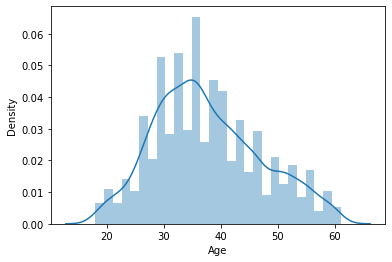

In [332]:
sns.distplot(data['Age'])
# observation: Slightly Right skewed Normal/Gaussian Distribution

<AxesSubplot:xlabel='DurationOfPitch', ylabel='Density'>

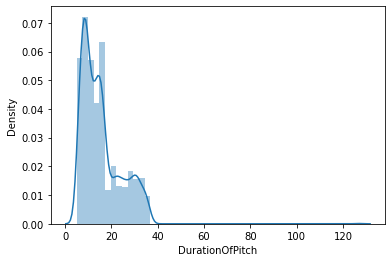

In [334]:
sns.distplot(data['DurationOfPitch'])
# observation: Right skewed Distribution

<AxesSubplot:xlabel='NumberOfTrips', ylabel='Density'>

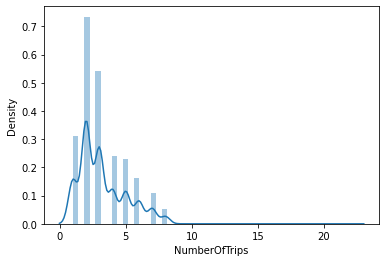

In [376]:
sns.distplot(data['NumberOfTrips'])
# observation: Right skewed Distribution

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

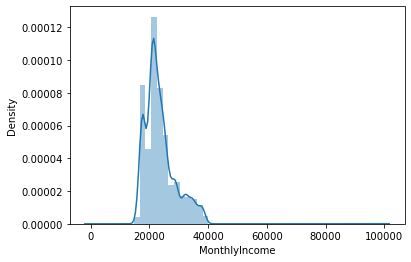

In [355]:
sns.distplot(data['MonthlyIncome'])
# observation: Right skewed Normal/Gaussian Distribution

#### 3.1.2 Univariate Analysis of Categorical Variables: Count Plot

In [443]:
print(data.columns)
print(f"Categorical Features are: {cat_colum}\n")
print("Features with numerical values having categorical information: ", num_cat_info)

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')
Categorical Features are: ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']

Features with numerical values having categorical information:  ['ProdTaken', 'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting']


<AxesSubplot:xlabel='ProdTaken', ylabel='count'>

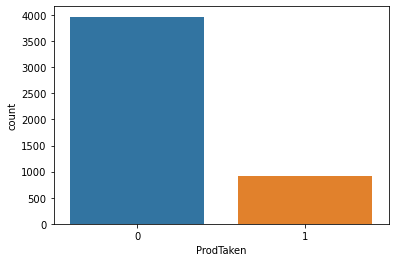

In [369]:
sns.countplot(data['ProdTaken'])
# observation: 
# Categorical data with classes represented as numric 0 and 1.
# No product taken is more than taken.

<AxesSubplot:xlabel='TypeofContact', ylabel='count'>

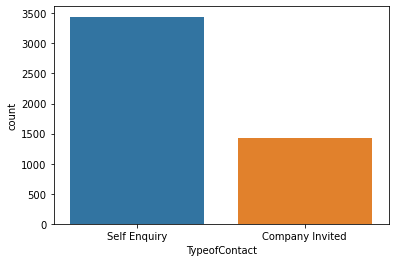

In [445]:
sns.countplot(data['TypeofContact'])
# observation: 
# Categorical data with classes represented as Self Enquiry and Company Invited.

<AxesSubplot:xlabel='CityTier', ylabel='count'>

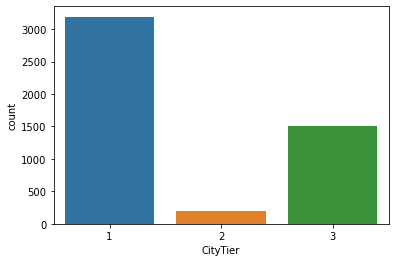

In [370]:
sns.countplot(data['CityTier'])
# observation: 
# Categorical data with classes represented as numric 1,2 and 3.
# 1>3>2
# IMBALANCE

<AxesSubplot:xlabel='Occupation', ylabel='count'>

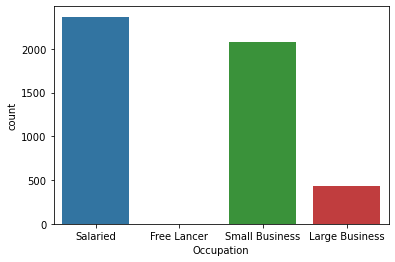

In [446]:
sns.countplot(data['Occupation'])
# observation: 
# Categorical data with classes represented as Salaried, Freelancer, Small business,Large business.
# IMBALACE

<AxesSubplot:xlabel='Gender', ylabel='count'>

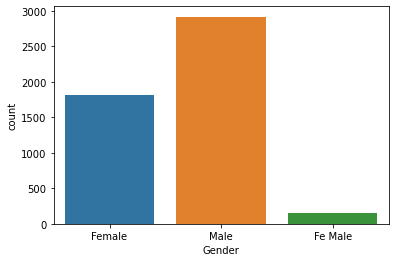

In [449]:
sns.countplot(data['Gender'])
# observation: 
# Categorical data with classes represented as Male and Female.

<AxesSubplot:xlabel='NumberOfPersonVisiting', ylabel='count'>

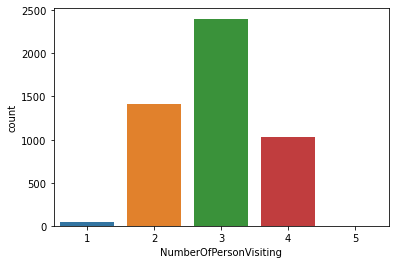

In [371]:
sns.countplot(data['NumberOfPersonVisiting'])
# observation: 
# Categorical data with classes represented as numric 2, 3 and 4.
# 3>2>4
# IMBALANCE

<AxesSubplot:xlabel='NumberOfFollowups', ylabel='count'>

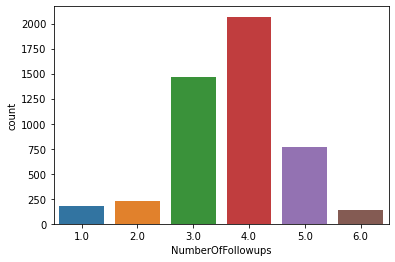

In [372]:
sns.countplot(data['NumberOfFollowups'])
# observation: 
# Categorical data with classes represented as numric 1,2,3,4,5, and 6.
# 4>3>5>2>1>6
# IMBALANCE

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

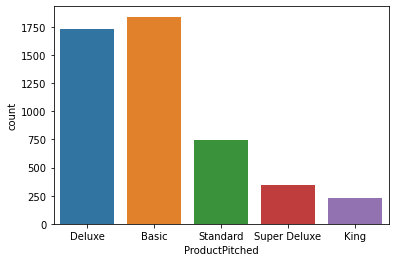

In [450]:
sns.countplot(data['ProductPitched'])
# observation: 
# Categorical data with classes represented as Deluxe, Basic, Standard Product Pitched,Super Deluxe, King
# Imbalace

<AxesSubplot:xlabel='PreferredPropertyStar', ylabel='count'>

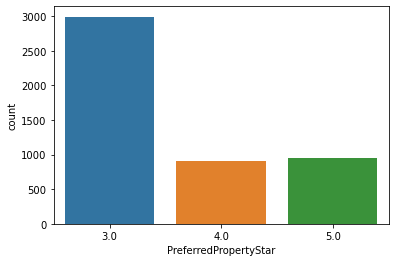

In [373]:
sns.countplot(data['PreferredPropertyStar'])
# observation: 
# Categorical data with classes represented as numric 3,4 and 5.
# 4>5>4

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

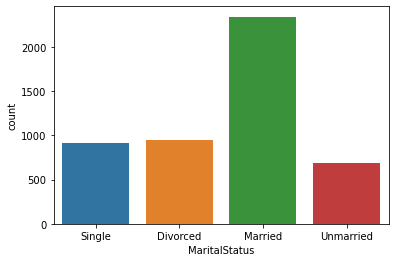

In [454]:
sns.countplot(data['MaritalStatus'])
# observation: 
# Categorical data with classes represented as Single, Divorced, Married, Unmarried

<AxesSubplot:xlabel='Passport', ylabel='count'>

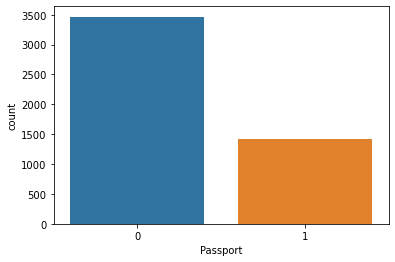

In [386]:
sns.countplot(data['Passport'])
# observation: 
# Categorical data with classes represented as numric 0 and 1.
# 0>1: people with no passprt is more

<AxesSubplot:xlabel='PitchSatisfactionScore', ylabel='count'>

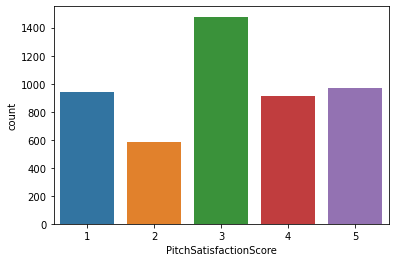

In [387]:
sns.countplot(data[ 'PitchSatisfactionScore'])
# observation: 
# Categorical data with classes represented as numric 1,2,3,4,5.
# 3>5>1>4>2

<AxesSubplot:xlabel='OwnCar', ylabel='count'>

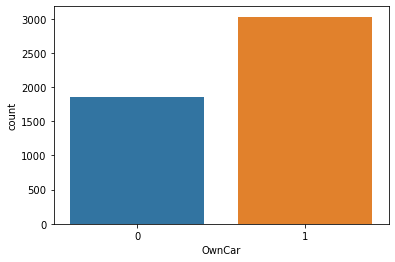

In [388]:
sns.countplot(data['OwnCar'])
# observation: 
# Categorical data with classes represented as numric 0 and 1:
# 1>0: People whi own car are more in this dataset.

<AxesSubplot:xlabel='NumberOfChildrenVisiting', ylabel='count'>

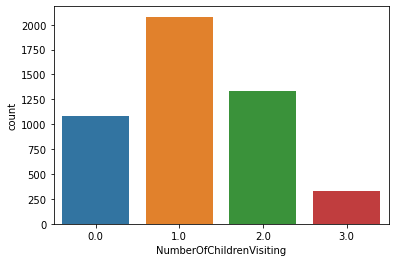

In [389]:
sns.countplot(data['NumberOfChildrenVisiting'])
# observation: 
# Categorical data with classes represented as numric 0,1,2,3.
# 1>2>0>3
# IMBALANCE

<AxesSubplot:xlabel='Designation', ylabel='count'>

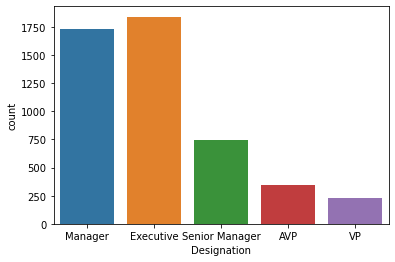

In [456]:
sns.countplot(data['Designation'])
# observation: 
# Categorical data with classes represented as Manager, Executive, Senior Manager, AVP VP

##### 3.1.3 Analysis of Outliers: BoxPlot

In [390]:
num_info

['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']

<AxesSubplot:>

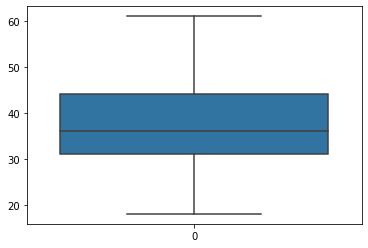

In [391]:
sns.boxplot(data=data['Age'])

<AxesSubplot:>

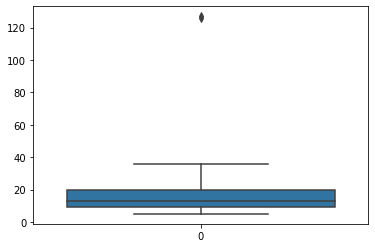

In [392]:
sns.boxplot(data=data['DurationOfPitch'])

<AxesSubplot:>

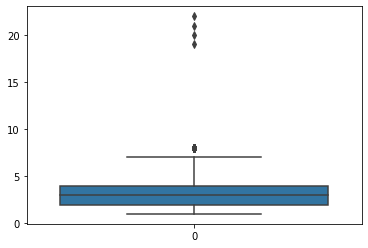

In [393]:
sns.boxplot(data=data['NumberOfTrips'])

<AxesSubplot:>

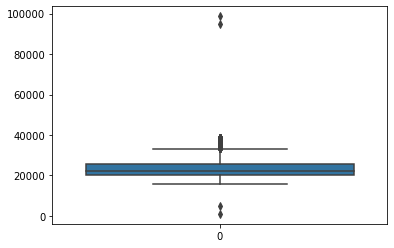

In [394]:
sns.boxplot(data=data['MonthlyIncome'])

### 3.2 Bivariate
#### 3.2.1 Bivariate Analysis of Numerical Features: Scatter Plot    

In [399]:
num_info

['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

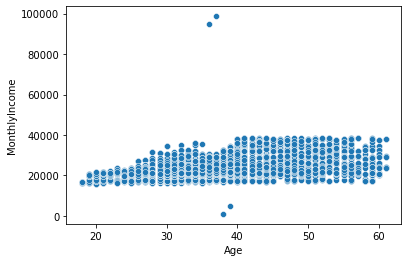

In [401]:
sns.scatterplot(x='Age',y='MonthlyIncome',data=data)

<AxesSubplot:xlabel='Age', ylabel='DurationOfPitch'>

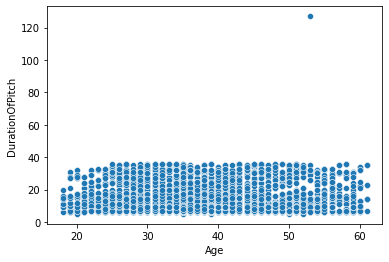

In [402]:
sns.scatterplot(x='Age',y='DurationOfPitch',data=data)

<AxesSubplot:xlabel='Age', ylabel='NumberOfTrips'>

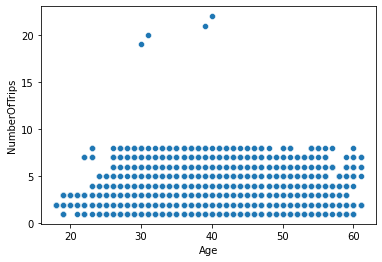

In [403]:
sns.scatterplot(x='Age',y='NumberOfTrips',data=data)

#### 3.2.2 Bivariate Analysis of Categorical Variables vs Categorical Variables: Count Plot side by side bar chart

In [407]:
print(f"Categorical Features are: {cat_colum}\n")
print(f"Features with numerical values having categorical information: {num_cat_info}\n")

Categorical Features are: ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']

Features with numerical values having categorical information: ['ProdTaken', 'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting']



<AxesSubplot:xlabel='NumberOfPersonVisiting', ylabel='count'>

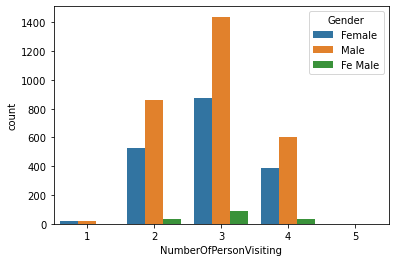

In [409]:
sns.countplot(data['NumberOfPersonVisiting'], hue= data['Gender'])

<AxesSubplot:xlabel='NumberOfFollowups', ylabel='count'>

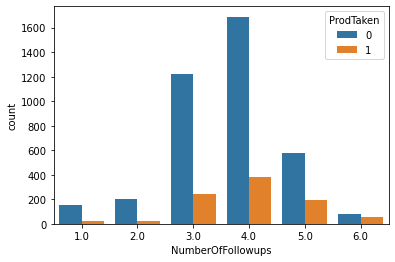

In [410]:
sns.countplot(data['NumberOfFollowups'], hue= data['ProdTaken'])

<AxesSubplot:xlabel='NumberOfPersonVisiting', ylabel='count'>

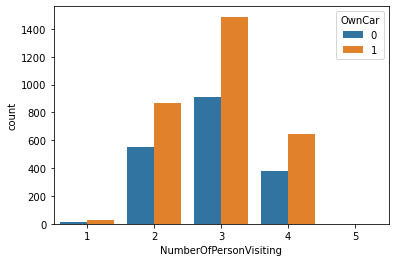

In [411]:
sns.countplot(data['NumberOfPersonVisiting'], hue= data['OwnCar'])

<AxesSubplot:xlabel='NumberOfPersonVisiting', ylabel='count'>

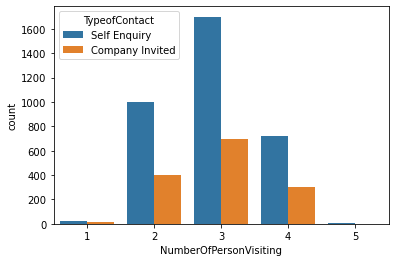

In [412]:
sns.countplot(data['NumberOfPersonVisiting'], hue= data['TypeofContact'])

### 3.3 Multivariate: Pair plot
 - Multivariate analysis is a more complex form of a statistical analysis technique and is used when there are more than two variables in the data set. Here, we will try to see relations between continuous variables and the ‘Approved’ column. To do that, we will plot a pair plot, with Hue as Approved.

In [418]:
data.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

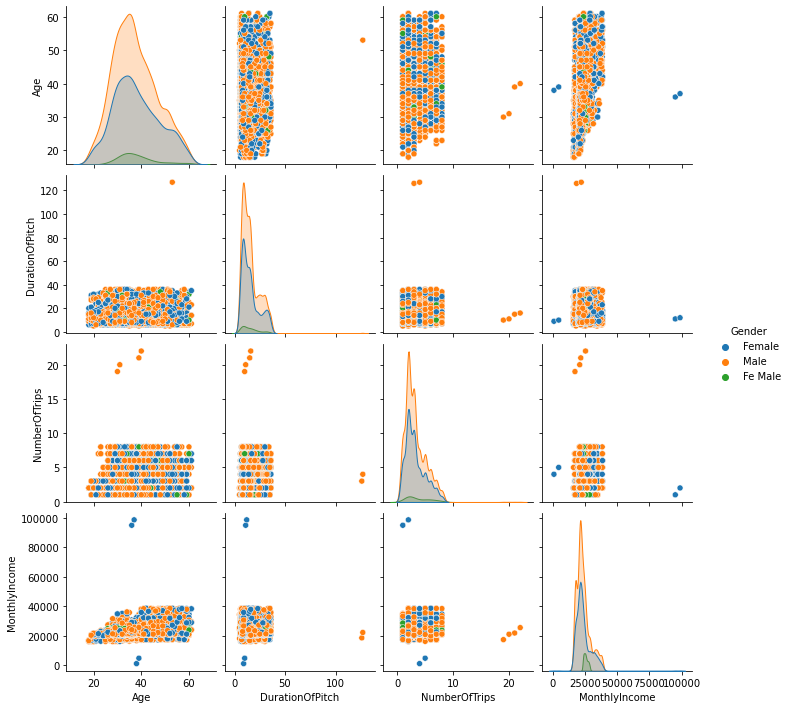

In [425]:
# pairplot with hue Gender
sns.pairplot(data, hue = 'Gender', vars= num_info )
# to show
plt.show()

# **Observations:**
- Handle Missing values 
- Handle Incorrect values in 'Gender': 'Fe male'
- Handle the outliers
- Scale and trasformation of the Right skewed data
- Encoding for categorical data
- Feature Selection 
- Imbalance data

### Handle Missing values 

In [431]:
Missing_Values_Features= ['Age','TypeofContact', 'DurationOfPitch', 'NumberOfFollowups','PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisiting', 'MonthlyIncome']
data[Missing_Values_Features].isnull().sum()

Age                         226
TypeofContact                25
DurationOfPitch             251
NumberOfFollowups            45
PreferredPropertyStar        26
NumberOfTrips               140
NumberOfChildrenVisiting     66
MonthlyIncome               233
dtype: int64

### Handle Incorrect values in 'Gender': 'Fe male'

In [433]:
data['Gender'].unique()

array(['Female', 'Male', 'Fe Male'], dtype=object)

### Handle the outliers

In [437]:
Outliers_Features = ['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']
Outliers_Features

['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']

### Scale and trasformation of the Right skewed data

In [436]:
Right_Skewed_Features= num_info
Right_Skewed_Features

['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']

### Encoding for Categorical data

In [438]:
cat_colum

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

### Feature Selection 
- NumberOfChildrenVisiting and NumberOfPersonVisiting are correlated with positive 0.610621. highly coreelated.
- Designation is highly correlated with Age, Productpitched and Monthly Income

### Imbalance Data

In [452]:
print(f"Categorical Features are: {cat_colum}\n")
print("Features with numerical values having categorical information: ", num_cat_info)

Categorical Features are: ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']

Features with numerical values having categorical information:  ['ProdTaken', 'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting']


In [451]:
Imbalance_Features = ['CityTier','NumberOfPersonVisiting','NumberOfFollowups','Occupation', 'ProductPitched']